# Exploratory Data Analysis


In this notebook we will explore the citation dataset. You should already have installed py2neo, pandas, and matplotlib when setting up our environment, so you will now import them (remember to unset Reset all runtimes before running):

In [4]:
from py2neo import Graph
import pandas as pd

import matplotlib 
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
pd.set_option('display.float_format', lambda x: '%.3f' % x)

Update the cell below to use the IP Address, Bolt Port, and Password, as you did previously.

In [5]:
# Change the line of code below to use the Bolt URL,  and Password of your Neo4j Database instance.
# graph = Graph("<Bolt URL>", auth=("neo4j", "<Password>")) 
 
graph = Graph("bolt://localhost:7687", auth=("neo4j", "1234"))

## What's in our database?

Run the following query to check how many nodes the database contains:

In [6]:
graph.run("CALL db.schema.visualization()").data()

[{'nodes': [Node('Venue', constraints=["Constraint( id=6, name='constraint_ae6d9b7b', type='UNIQUENESS', schema=(:Venue {name}), ownedIndex=5 )"], indexes=[], name='Venue'),
   Node('Article', constraints=["Constraint( id=2, name='constraint_2e688049', type='UNIQUENESS', schema=(:Article {index}), ownedIndex=1 )"], indexes=[], name='Article'),
   Node('Author', constraints=["Constraint( id=4, name='constraint_293d3e9e', type='UNIQUENESS', schema=(:Author {name}), ownedIndex=3 )"], indexes=[], name='Author')],
  'relationships': [VENUE(Node(), Node()),
   AUTHOR(Node(), Node()),
   CITED(Node(), Node())]}]

If you run that query (CALL db.schema.visualization()) in  Neo4j Browser, you see the following visualization:

<img src="images/data-science-training.png" alt="Graph Data Model"/>


Drill down a bit. How many nodes do we have for each of these labels? Run this code:

In [7]:
result = {"label": [], "count": []}
for label in graph.run("CALL db.labels()").to_series():
    query = f"MATCH (:`{label}`) RETURN count(*) as count"
    count = graph.run(query).to_data_frame().iloc[0]['count']
    result["label"].append(label)
    result["count"].append(count)
nodes_df = pd.DataFrame(data=result)
nodes_df.sort_values("count")

,label,count
2,Venue,4
1,Author,80299
0,Article,184313


You can visualize the counts using matplotlib. Run the following code:

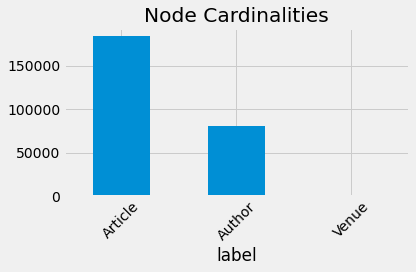

In [8]:
nodes_df.plot(kind='bar', x='label', y='count', legend=None, title="Node Cardinalities")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

What types of relationships do we have in our graph? Run this code:

In [9]:
result = {"relType": [], "count": []}
for relationship_type in graph.run("CALL db.relationshipTypes()").to_series():
    query = f"MATCH ()-[:`{relationship_type}`]->() RETURN count(*) as count"
    count = graph.run(query).to_data_frame().iloc[0]['count']
    result["relType"].append(relationship_type)
    result["count"].append(count)
rels_df = pd.DataFrame(data=result)
rels_df.sort_values("count")

,relType,count
0,VENUE,51956
1,AUTHOR,140575
2,CITED,289908


You can visualize the counts using matplotlib. Run  the following code:

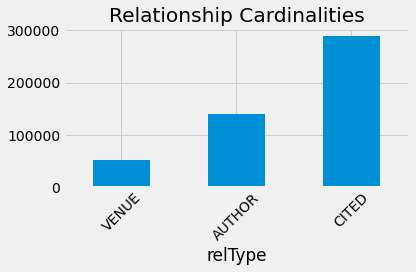

In [10]:
rels_df.plot(kind='bar', x='relType', y='count', legend=None, title="Relationship Cardinalities")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Next,  you will explore the citation data. The following query finds 25 authors, articles, venues, and also shows the number of articles that article has cited, as well as the number of articles that it's been cited by.
Run this code:

In [11]:
exploratory_query = """
MATCH (author:Author)<-[:AUTHOR]-(article:Article)-[:VENUE]->(venue)
RETURN article.title AS article, author.name AS author, venue.name AS venue, 
       size((article)-[:CITED]->()) AS citationsGiven, size((article)<-[:CITED]-()) AS citationsReceived
ORDER BY rand()
LIMIT 25
"""

graph.run(exploratory_query).to_data_frame()

,article,author,venue,citationsGiven,citationsReceived
0,Query by humming with the VocalSearch system,Roger B. Dannenberg,Communications of The ACM,8,1
1,Speaking Autonomous Intelligent Devices,Robert J. Ross,Lecture Notes in Computer Science,0,0
2,RFID-based techniques for human-activity detec...,Alexander V. Mamishev,Communications of The ACM,4,0
3,"Anton, a special-purpose machine for molecular...",Douglas J. Ierardi,Communications of The ACM,11,1
4,Jamming-based adversarial control of network f...,Phillip Lee,advances in computing and communications,12,0
5,Multicode Multirate Compact Assignment of OVSF...,Yang Yang,Lecture Notes in Computer Science,10,0
6,Word Classification Using Neural Network,R. Rajesh,advances in computing and communications,18,0
7,Efficient FPGA implementation of a knowledge-b...,Salvatore Vitabile,Lecture Notes in Computer Science,0,0
8,Privacy enforcement for IT governance in enter...,Pete Bramhall,Lecture Notes in Computer Science,0,0
9,The COOLFluiD parallel architecture,Andrea Lani,Lecture Notes in Computer Science,1,0


Examine the citation data more closely. Here is a query that returns the number of citations that each article has, and then creates a distribution of those counts using pandas `describe` function. Run this code:

In [12]:
query = """
MATCH (a:Article)
RETURN size((a)<-[:CITED]-()) AS citations
"""

citation_df = graph.run(query).to_data_frame()
citation_df.describe([.25, .5, .75, .9, .99])

,citations
count,184313.000
mean,1.573
std,3.386
min,0.000
25%,1.000
50%,1.000
75%,2.000
90%,3.000
99%,12.000
max,276.000


Most articles are being cited very few times. 99% of articles have 8 citations or less. Notice that one article has been cited more than 200 times. You will use a log scale histogram to visualize the data. Run this code:

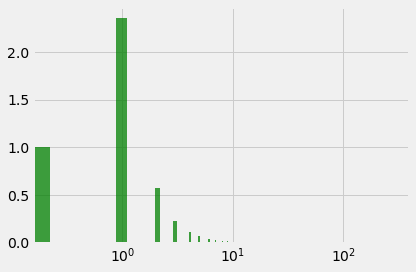

In [13]:
fig1, ax1 = plt.subplots()
ax1.hist(pd.Series(citation_df['citations'].dropna()), 1250, density=True, facecolor='g', alpha=0.75)
ax1.set_xscale("log")
plt.tight_layout()
plt.show()